In [2]:
%autosave 100

Autosaving every 100 seconds


In [ ]:
import urllib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

url = "https://dl.dropboxusercontent.com/s/q9geru5vtmz5b55/vk.adjlist?dl=1"
with urllib.request.urlopen(url) as f:
    data = f.read().decode('utf-8')
with open('vk.adjlist', 'w') as f:
    f.write(data) 
    
G = nx.read_adjlist('vk.adjlist')
coord = nx.spring_layout(G, k = 0.15)

In [ ]:
k = dict (G.degree ())
k2 = {key: value for key, value in k.items() if value > 0}
G2 = G.subgraph(list(k2.keys()))


In [ ]:
# take only giant connected component for the further analysis: 
Gc = max(nx.connected_component_subgraphs(G), key=len)
print("Number of nodes -", len(Gc.nodes()))
print("Number of edges -", len(Gc.edges()))

# Structural analysis.

## Centrality measures:

Degree centrality:

{'VK_9462843': 0.013491635186184566,
 'VK_1756709': 0.01457096600107933,
 'VK_7656877': 0.015650296815974095,
 'VK_11971162': 0.01672962763086886,
 'VK_14388089': 0.017269293038316244,
 'VK_22698341': 0.01403130059363195,
 'VK_25562542': 0.017269293038316244,
 'VK_26233510': 0.02266594711279007,
 'VK_26251799': 0.019427954668105776,
 'VK_29381515': 0.011332973556395036,
 'VK_30328083': 0.015110631408526714,
 'VK_32072374': 0.011872638963842417,
 'VK_39663468': 0.024284943335132217,
 'VK_51855111': 0.030221262817053427,
 'VK_52622258': 0.022126281705342688,
 'VK_55297827': 0.021586616297895305,
 'VK_55353940': 0.0059363194819212085,
 'VK_56563535': 0.019967620075553156,
 'VK_65358870': 0.025364274150026983,
 'VK_72792807': 0.021046950890447922,
 'VK_75746246': 0.02914193200215866,
 'VK_111057848': 0.02644360496492175,
 'VK_156702374': 0.0032379924446842958,
 'VK_192791324': 0.008634646519158122,
 'VK_209903492': 0.011872638963842417,
 'VK_241255837': 0.009174311926605505,
 'VK_25018870'

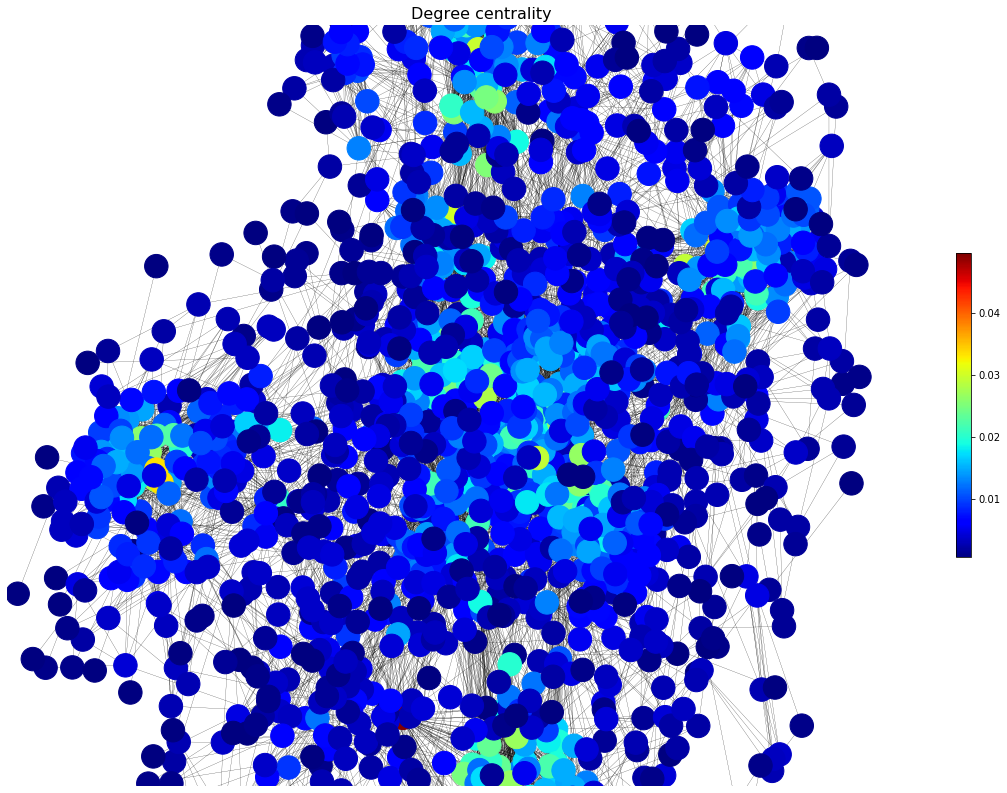

In [51]:
plt.figure(figsize=(20,14))
degree_centr = nx.degree_centrality(Gc)
node_colors = list(degree_centr.values())

nodes = nx.draw_networkx_nodes(Gc, pos = coord, 
                               node_color=node_colors,
                               node_size = 550,
                               nodelist=list(degree_centr.keys()),
                               cmap = 'jet',
                               with_labels = False)
edges = nx.draw_networkx_edges(Gc, pos = coord, width = .2)
plt.xlim([-.95, .9])
plt.ylim([-.5, .6])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Degree centrality', fontsize = 16)
plt.axis("off")

top_nodes = sorted(degree_centr, key = degree_centr.get)[-3:]
degree_centr

Closeness centrality

In [38]:
plt.figure(figsize=(20,14))
closeness_centr = nx.closeness_centrality(Gc)
node_colors = list(closeness_centr.values())

nodes = nx.draw_networkx_nodes(Gc, pos = coord, 
                               node_color=node_colors,
                               node_size = 550,
                               nodelist=list(closeness_centr.keys()),
                               cmap = 'jet',
                               with_labels = False
                               )
edges = nx.draw_networkx_edges(Gc, pos = coord, width = .2)
plt.xlim([-.95, .9])
plt.ylim([-.5, .6])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Closeness centrality', fontsize = 16)
plt.axis("off")

top_nodes = sorted(closeness_centr, key = closeness_centr.get)[-3:]


KeyboardInterrupt: 

<Figure size 1440x1008 with 0 Axes>

Betweenness centrality can reveal which nodes make communities to be connected:

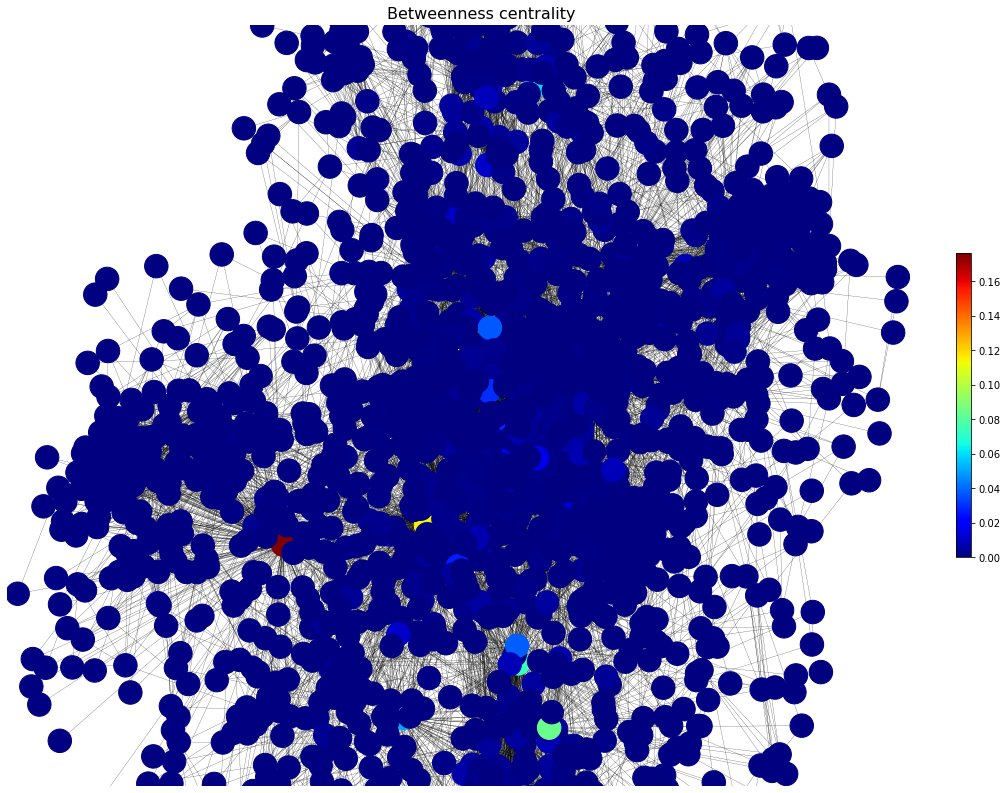

In [25]:
plt.figure(figsize=(20,14))
between_centr = nx.betweenness_centrality(Gc)
node_colors = list(between_centr.values())

nodes = nx.draw_networkx_nodes(Gc, pos = coord, 
                               node_color=node_colors,
                               node_size = 550,
                               nodelist=list(between_centr.keys()),
                               cmap = 'jet',
                               with_labels = False
                               )
edges = nx.draw_networkx_edges(Gc, pos = coord, width = .2)
plt.xlim([-.95, .9])
plt.ylim([-.5, .6])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Betweenness centrality', fontsize = 16)
plt.axis("off")

top_nodes = sorted(between_centr, key = between_centr.get)[-5:]


Pagerank. Comparison with centrality measures.

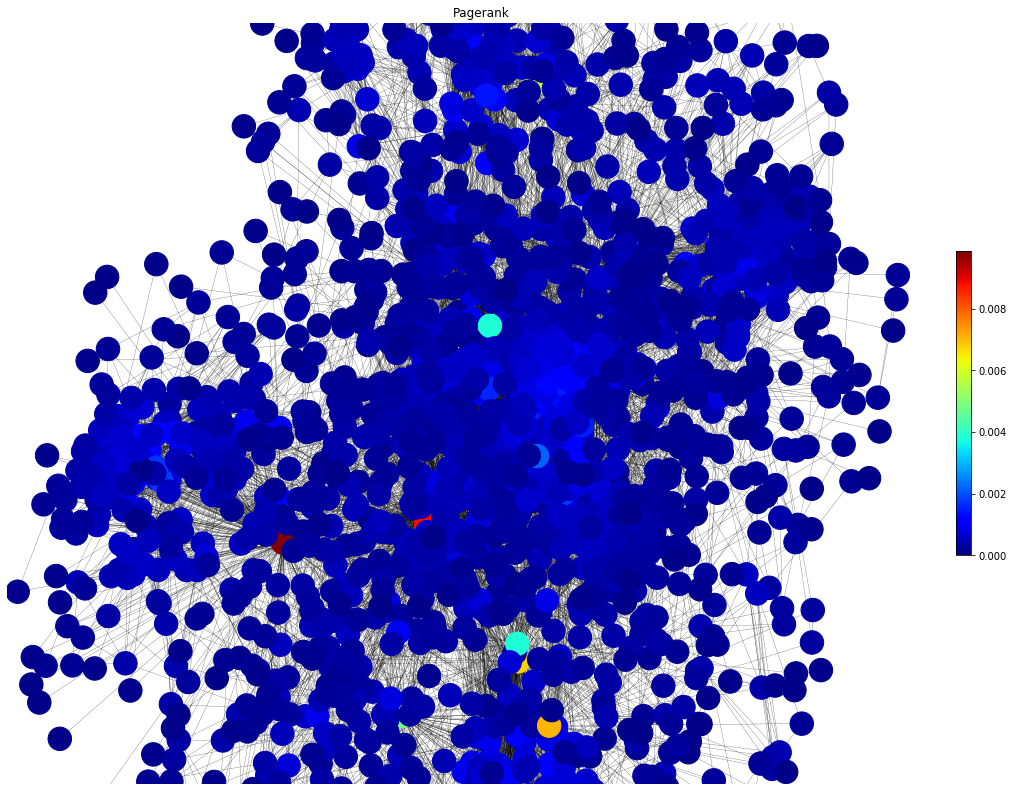

In [26]:
plt.figure(figsize=(20,14))
page_rank = nx.pagerank(Gc)
node_colors = list(page_rank.values())

nodes = nx.draw_networkx_nodes(Gc, pos = coord, 
                               node_color=node_colors,
                               node_size = 550,
                               nodelist=list(page_rank.keys()),
                               cmap = 'jet',
                               with_labels = False,
                               vmin = 0.0)
edges = nx.draw_networkx_edges(Gc, pos = coord, width = .2)
plt.xlim([-.95, .9])
plt.ylim([-.5, .6])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Pagerank')
plt.axis("off")

top_nodes = sorted(page_rank, key = page_rank.get)[-3:]



In [18]:
# function to create proper histogram in matplotlib:
def plot_hist(data, colormap, alpha, bins = 10, round_value = 1):
    cm = plt.cm.get_cmap(colormap)
    counts, bins, patches = plt.hist(data, alpha = alpha, color = 'Blue', bins = bins)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    plt.xticks(bins.round(round_value))
    col = bin_centers - min(bin_centers)
    col /= max(col)
    # use various colors for different bins:
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)

Comparison of metrics:

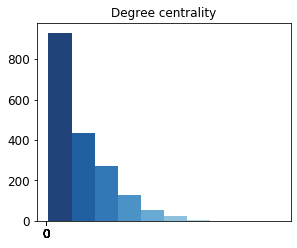

In [52]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.title("Degree centrality", y = 1.00)
plot_hist(data = list(degree_centr.values()), colormap = 'Blues_r', alpha = 0.9, bins = 10, round_value=1)

